In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#format the floating points in Jupyter output cell
pd.options.display.float_format = '{:.2f}'.format
# Set the float format using np.set_printoptions()
np.set_printoptions(precision=2, suppress=True)

In [2]:
#import boston housing price dataset from keras

from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
print(f"Training Data : {train_data.shape}")
print(f"Test Data : {test_data.shape}")
print(f"Training Samples : {train_data[1]}")
print(f"Training Target Samples : {train_targets[1]}")


Training Data : (404, 13)
Test Data : (102, 13)
Training Samples : [  0.02  82.5    2.03   0.     0.41   7.61  15.7    6.27   2.   348.
  14.7  395.38   3.11]
Training Target Samples : 42.3


In [4]:
train_data.mean(axis=0)

array([  3.75,  11.48,  11.1 ,   0.06,   0.56,   6.27,  69.01,   3.74,
         9.44, 405.9 ,  18.48, 354.78,  12.74])

In [5]:
#import StandardScaler and Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)


In [6]:
#building the neural network

from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(64,activation='relu' ,input_shape=(scaled_train_data.shape[1],)),
    Dense(64,activation='relu'),
    Dense(1)
])

#compile the model using adam optimizer 
model.compile(optimizer='rmsprop',loss='mse', metrics=['mae'])  
model.summary()

    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


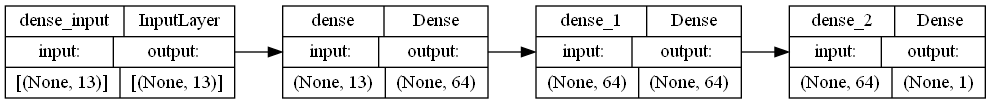

In [7]:
# Import the required module for visualization
from keras.utils.vis_utils import plot_model

# Generate the image file for the model summary
plot_model(model, to_file='model_summary.png', show_shapes=True, show_layer_names=True, rankdir='LR')

In [8]:
# K-fold validation
k = 4 
num_val_samples = len(scaled_train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print(f"Processing fold {i}")
    val_data = scaled_train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate( 
        [scaled_train_data[:i * num_val_samples],
          scaled_train_data[(i + 1) * num_val_samples:]],
          axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
          train_targets[(i + 1) * num_val_samples:]],
          axis=0)
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs,batch_size=1,verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold 0
Processing fold 1
Processing fold 2
Processing fold 3


In [9]:
print(f"all_scores : {all_scores}")
print(f"mean_scores : {np.mean(all_scores)}")
print(f"std_scores : {np.std(all_scores)}")

all_scores : [2.1902554035186768, 2.423675775527954, 1.9264979362487793, 1.5690051317214966]
mean_scores : 2.0273585617542267
std_scores : 0.31775125790086245


([<matplotlib.axis.XTick at 0x1e419072d10>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

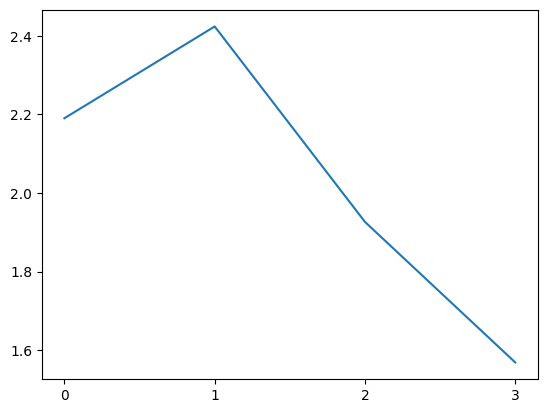

In [10]:
# Draw a line plot for all_scores variable
import matplotlib.pyplot as plt
plt.plot(all_scores)
plt.xticks(range(k))


In [11]:
model.fit(scaled_train_data, train_targets, epochs=80, batch_size=16)
test_mse_score, test_mea_score  = model.evaluate(scaled_test_data, test_targets)

Epoch 1/80
26/26 [==============================] - 0s 2ms/step - loss: 1.7859 - mae: 0.8398
Epoch 2/80
26/26 [==============================] - 0s 1ms/step - loss: 1.4930 - mae: 0.8135
Epoch 3/80
26/26 [==============================] - 0s 1ms/step - loss: 1.2571 - mae: 0.7579
Epoch 4/80
26/26 [==============================] - 0s 1ms/step - loss: 1.1817 - mae: 0.7787
Epoch 5/80
26/26 [==============================] - 0s 2ms/step - loss: 1.0878 - mae: 0.7307
Epoch 6/80
26/26 [==============================] - 0s 2ms/step - loss: 1.0000 - mae: 0.7104
Epoch 7/80
26/26 [==============================] - 0s 2ms/step - loss: 0.9518 - mae: 0.6892
Epoch 8/80
26/26 [==============================] - 0s 1ms/step - loss: 0.9746 - mae: 0.7101
Epoch 9/80
26/26 [==============================] - 0s 1ms/step - loss: 0.9007 - mae: 0.6819
Epoch 10/80
26/26 [==============================] - 0s 1ms/step - loss: 0.9180 - mae: 0.6698
Epoch 11/80
26/26 [==============================] - 0s 1ms/step - lo

In [12]:
print(test_mea_score, test_mse_score)

2.521510601043701 12.260225296020508


In [13]:
for data in boston_housing.load_data():
    print(data)
    

(array([[  1.23,   0.  ,   8.14, ...,  21.  , 396.9 ,  18.72],
       [  0.02,  82.5 ,   2.03, ...,  14.7 , 395.38,   3.11],
       [  4.9 ,   0.  ,  18.1 , ...,  20.2 , 375.52,   3.26],
       ...,
       [  0.03,  35.  ,   6.06, ...,  16.9 , 362.25,   7.83],
       [  2.15,   0.  ,  19.58, ...,  14.7 , 261.95,  15.79],
       [  0.01,  60.  ,   2.93, ...,  15.6 , 376.7 ,   4.38]]), array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. 

In [14]:
df_train = pd.DataFrame(train_data)
df_train['MEDV'] = train_targets
df_test = pd.DataFrame(test_data)
df_test['MEDV'] = test_targets

df = pd.concat([df_train, df_test], axis=1)
print(df.shape)

(404, 28)


In [15]:
# split the df into X and y
X = df.iloc[:, 0:13]
y = df.iloc[:, 13]

In [16]:
from keras.layers import Dense
from keras.models import Sequential
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model

In [17]:
seed = 7 
np.random.seed(seed)

In [18]:
# import libraries  KerasRegressor
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
es = KerasRegressor( build_fn=baseline_model, epochs=100, batch_size=32, verbose=0)

C:\Users\rachit\AppData\Local\Temp\ipykernel_20620\2063509425.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  es = KerasRegressor( build_fn=baseline_model, epochs=100, batch_size=32, verbose=0)


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from random import seed
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
estimaters = []
estimaters.append(("StandardScaler", StandardScaler()))
estimaters.append(("mlp", es))

pipeline = Pipeline(estimaters)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold)

In [20]:
print("Standardized : %.2f (%.2f)" % (np.mean(results), np.std(results)))


Standardized : -30.21 (13.79)


In [21]:
def larger_model():
    model = Sequential()
    model.add(Dense(13, input_shape=(13,), kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model



In [22]:
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.pipeline import Pipeline
from random import seed
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
estimaters =[]
estimaters.append(("StandardScalerer",StandardScaler()))
estimaters.append(("mlp", KerasRegressor(build_fn=larger_model, epochs=100, batch_size=32, verbose=1)))

pipeline = Pipeline(estimaters)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold)



Epoch 1/100


C:\Users\rachit\AppData\Local\Temp\ipykernel_20620\568365904.py:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimaters.append(("mlp", KerasRegressor(build_fn=larger_model, epochs=100, batch_size=32, verbose=1)))


12/12 [==============================] - 1s 1ms/step - loss: 589.1855
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 588.4182
Epoch 3/100
12/12 [==============================] - 0s 1ms/step - loss: 587.3492
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 585.7623
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 583.3485
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 579.6468
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 574.3187
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 566.8883
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 556.9693
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 543.9915
Epoch 11/100
12/12 [==============================] - 0s 2ms/step - loss: 527.2552
Epoch 12/100
12/12 [==============================] - 0s 1ms/step - loss: 507.4484
Epoch 13/100
12/12 [=====

In [23]:
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))


Larger: -24.14 (10.98) MSE


In [24]:
def wider_model():
    model = Sequential()
    model.add(Dense(20, input_shape=(13,), kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model



In [25]:
from sklearn.preprocessing import StandardScaler
from random import seed
from sklearn.model_selection import cross_val_score
estimaters = []
estimaters.append(("StandardScaler", StandardScaler()))
estimaters.append(("mlp", KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))

pipeline = Pipeline(estimaters)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold)

C:\Users\rachit\AppData\Local\Temp\ipykernel_20620\2776399509.py:6: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimaters.append(("mlp", KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))


In [26]:
print("Wider : %.2f (%.2f)" % (np.mean(results), np.std(results)))


Wider : -12.99 (6.62)


In [27]:
from keras.models import Sequential
from keras.layers import Dense
def wider_deep_model():

    model = Sequential()
    model.add(Dense(25, input_dim=13, kernel_initializer="normal" , activation='relu'))
    model.add(Dense(18, kernel_initializer="normal" , activation='relu'))
    model.add(Dense(7, kernel_initializer="normal" , activation='relu'))
    model.add(Dense(1, kernel_initializer="normal" ))

    model.compile(loss='mean_squared_error', optimizer='adam')
    return  model    

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from random import seed
from sklearn.model_selection import cross_val_score
estimaters = []
estimaters.append(("StandardScaler", StandardScaler()))
estimaters.append(("mlp", KerasRegressor(build_fn=wider_deep_model, nb_epoch=100, batch_size=5, verbose=0)))

pipeline = Pipeline(estimaters)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold)


C:\Users\rachit\AppData\Local\Temp\ipykernel_20620\852207824.py:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimaters.append(("mlp", KerasRegressor(build_fn=wider_deep_model, nb_epoch=100, batch_size=5, verbose=0)))


In [29]:
import numpy as np
print("Deeper and Wider : %.2f (%.2f)" % (np.mean(results), np.std(results)))

Deeper and Wider : -564.99 (105.56)
